In [13]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
from IPython.core.display import HTML; HTML(open("custom.html", "r").read())

# Chapter 1: General Introduction to machine learning (ML)

## ML = "learning models from data"


### About models

A "model" allows us to explain observations and to answer questions. For example:

   1. Where will my car at given velocity stop if I apply break now?
   2. Where on the night sky will I see the moon tonight?
   3. Is the email I received spam?
   4. What product should I recommend my customer `X` ?
   
- The first two questions can be answered based on existing physical models (formulas). 

- For the  questions 3 and 4 it is difficult to develop explicitly formulated models. 

### What is needed to apply ML ?


- We have no explicit formula for such a task.


- We have a vague understanding of the problem domain, e.g. we know that some words are specific to spam emails and others are specific to my personal and work-related emails.


- We have enough example data, as my mailbox is full of both spam and non-spam emails.


We could handcraft a personal spam classifier by hard coding rules, like "mail contains 'no prescription' and comes from russia or china" plus some statistics which would be very tedious

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
    Systems with such hard coded rules are called <strong>expert systems</strong>
</div>

**In such cases machine learning offers approaches to automatically build predictive models based on example data.**


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
The closely-related concept of <strong>data mining</strong> usually means use of predictive machine learning models to explicitly discover previously unknown knowledge from a specific data set, such as, for instance, association rules between customer and article types in the Problem 4 above.
</div>



## ML: what is "learning" ?

To create a predictive model, we must first **train** such a model on given data. 

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
Alternative names for "to train" a model are "to <strong>fit</strong>" or "to <strong>learn</strong>" a model.
</div>


All ML algorithms have in common that they rely on internal data structures and/or parameters. Learning then builds up such data structures or adjusts parameters based on the given data. After that such models can be used to explain observations or to answer questions.

The important difference between explicit models and models learned from data:

- Explicit models usually offer exact answers to questions
- Models we learn from data usually come with inherent uncertainty.


## Some history

Some parts of ML are older than you might think. This is a rough time line with a few selected achievements from this field:

    1805: Least squares regression
    1812: Bayes' rule
    1913: Markov Chains

    1951: First neural network
    1957-65: "k-means" clustering algorithm
    1959: Term "machine learning" is coined by Arthur Samuel, an AI pioneer
    1969: Book "Perceptrons": Limitations of Neural Networks
    1974-86: Neural networks learning breakthrough: backpropagation method
    
    1984: Book "Classification And Regression Trees"
    1995: Randomized Forests and Support Vector Machines methods
    1998: Public appearance: first ML implementations of spam filtering methods; naive Bayes Classifier method
    2006-12: Neural networks learning breakthrough: deep learning
    
So the field is not as new as one might think, but due to 

- more available data
- more processing power 
- development of better algorithms 

more applications of machine learning appeared during the last 15 years.

## Machine learning with Python

Currently (as of 2019) `Python` is the  dominant programming language for ML. Especially the advent of deep-learning pushed this forward. First versions of frameworks such as `TensorFlow` or `PyTorch` got early `Python` releases.

The prevalent packages in the Python eco-system used for ML include:

- `pandas` for handling tabular data
- `matplotlib` and `seaborn` for plotting
- `scikit-learn` for classical (non-deep-learning) ML
- `TensorFlow`, `PyTorch` and `Keras` for deep-learning.

`scikit-learn` is very comprehensive and the online-documentation itself provides a good introducion into ML.

## ML lingo: What are "features" ?

A typical and very common situation is that our data is presented as a table, as in the following example:

In [14]:
import pandas as pd

features = pd.read_csv("beers.csv")
features.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>Definitions</strong>
<ul>
    <li>every row of such a matrix is called a <strong>sample</strong> or <strong>feature vector</strong>;</li>
    <li>the cells in a row are <strong>feature values</strong>;</li>
    <li>every column name is called a <strong>feature name</strong> or <strong>attribute</strong>.</li>
</ul>

Features are also commonly called <strong>variables</strong>.
</div>

This table shown holds five samples.

The feature names are `alcohol_content`, `bitterness`, `darkness`, `fruitiness` and `is_yummy`.

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>More definitions</strong>
<ul>
    <li>The first four features have continuous numerical values within some ranges - these are called <strong>numerical features</strong>,</li>
    <li>the <code>is_yummy</code> feature has only a finite set of values ("categories"): <code>0</code> ("no") and <code>1</code> ("yes") - this is called a <strong>categorical feature</strong>.</li>
</ul>


A straight-forward application of machine-learning on the previous beer dataset is: **"can we predict `is_yummy` from the other features"** ?

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>Even more definitions</strong>

In context of the question above we call:
<ul>
    <li>the <code>alcohol_content</code>, <code>bitterness</code>, <code>darkness</code>, <code>fruitiness</code> features our <strong>input features</strong>, and</li>
    <li>the <code>is_yummy</code> feature our <strong>target/output feature</strong> or a <strong>label</strong> of our data samples.
        <ul>
            <li>Values of categorical labels, such as <code>0</code> ("no") and <code>1</code> ("yes") here, are often called <strong>classes</strong>.</li>
        </ul>
    </li>
</ul>

### Most of the machine learning algorithms require that every sample is represented as a vector containing numbers. 

Let's look now at two examples of how one can create feature vectors from data which is not naturally given as vectors:

1. Feature vectors from images
2. Feature vectors from text.

### 1st Example: How to represent images as feature vectors ?

In order to simplify our explanations we only consider grayscale images in this section. 
Computers represent images as matrices. Every cell in the matrix represents one pixel, and the numerical value in the matrix cell its gray value.

So how can we represent images as vectors?

To demonstrate this we will now load a sample dataset that is included in `scikit-learn`:

In [15]:
from sklearn.datasets import load_digits

dd = load_digits()

In [16]:
print(dd.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's plot the first ten digits from this data set:

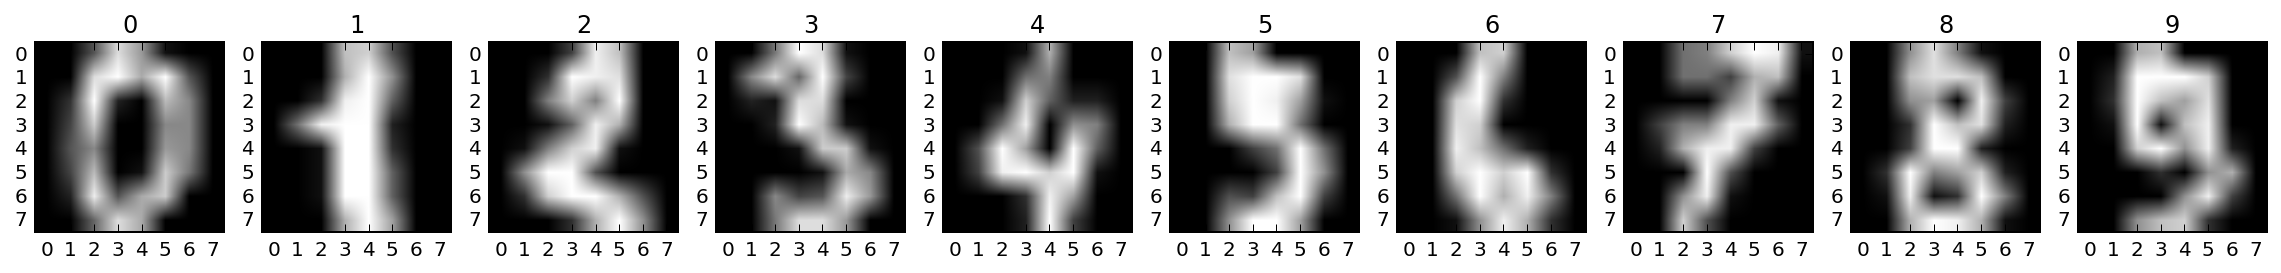

In [17]:
import matplotlib.pyplot as plt

N = 10

plt.figure(figsize=(2 * N, 5))

# dd.images:  list of 8 x 8 images
# dd.target:  label

for i, image in enumerate(dd.images[:N]):
    plt.subplot(1, N, i + 1).set_title(dd.target[i])
    plt.imshow(image, cmap="gray")

The data is a set of 8 x 8 matrices with values 0 to 15 (black to white). The range 0 to 15 is fixed for this specific data set. Other formats allow e.g. values 0..255 or floating point values in the range 0 to 1.

In [18]:
dd.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
print("images[0].shape:", dd.images[0].shape) # dimensions of a first sample array
print()
print("images[0]:\n", dd.images[0]) # first sample array

images[0].shape: (8, 8)

images[0]:
 [[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


To transform such an image to a feature vector we just have to flatten the matrix by concatenating the rows to one single vector of size 64:

In [20]:
image_vector = dd.images[0].flatten()
print("image_vector.shape:", image_vector.shape)
print("image_vector:", image_vector)

image_vector.shape: (64,)
image_vector: [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


### 2nd Example: How to present textual data as feature vectors?

If we start a machine learning project for texts, we first have to choose a dictionary (a set of words) for this project. The words in the dictionary are enumerated. The final representation of a text as a feature vector depends on this dictionary.

Such a dictionary can be very large, but for the sake of simplicity we use a very small enumerated dictionary to explain the overall procedure:


| Word     | Index |
|----------|-------|
| like     | 0     |
| dislike  | 1     |
| american | 2     |
| italian  | 3     |
| beer     | 4     |
| pizza    | 5     |

To "vectorize" a given text we count the words in the text which also exist in the vocabulary and put the counts at the given `Index`.

E.g. `"I dislike american pizza, but american beer is nice"`:

| Word     | Index | Count |
|----------|-------|-------|
| like     | 0     | 0     |
| dislike  | 1     | 1     |
| american | 2     | 2     |
| italian  | 3     | 0     |
| beer     | 4     | 1     |
| pizza    | 5     | 1     |

The respective feature vector is the `Count` column, which is:

`[0, 1, 2, 0, 1, 1]`

In real case scenarios the dictionary is much bigger, which often results in vectors with only few non-zero entries (so called **sparse vectors**).

Below you find is a short code example to demonstrate how text feature vectors can be created with `scikit-learn`.
<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
Such vectorization is usually not done manually. Actually there are improved but more complicated procedures which compute multiplicative weights for the vector entries to emphasize informative words such as, e.g., <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">"term frequency-inverse document frequency" vectorizer</a>.
</div>

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary = {
    "like": 0,
    "dislike": 1,
    "american": 2,
    "italian": 3,
    "beer": 4,
    "pizza": 5,
}

vectorizer = CountVectorizer(vocabulary=vocabulary)

# this how one can create a count vector for a given piece of text:
vector = vectorizer.fit_transform([
    "I dislike american pizza. But american beer is nice"
]).toarray().flatten()
print(vector)

[0 1 2 0 1 1]


## Taxonomy of machine learning

Most applications of ML belong to two categories: **supervised** and **unsupervised** learning.

### Supervised learning 

In supervised learning the data comes with an additional target/label value that we want to predict. Such a problem can be either 

- **classification**: we want to predict a categorical value.
    
- **regression**: we want to predict numbers in a given range.
    
  

Examples of supervised learning:

- Classification: predict the class `is_yummy`  based on the attributes `alcohol_content`,	`bitterness`, 	`darkness` and `fruitiness` (a standard two-class problem).

- Classification: predict the digit-shown based on a 8 x 8 pixel image (a multi-class problem).

- Regression: predict temperature based on how long sun was shining in the last 10 minutes.



<table>
    <tr>
    <td><img src="./classification-svc-2d-poly.png" width=400px></td>
    <td><img src="./regression-lin-1d.png" width=400px></td>
    </tr>
    <tr>
        <td><center>Classification</center></td>
        <td><center>Linear regression</center></td>
    </tr>
</table>


### Unsupervised learning 

In unsupervised learning the training data consists of samples without any corresponding target/label values and the aim is to find structure in data. Some common applications are:

- Clustering: find groups in data.
- Density estimation, novelty detection: find a probability distribution in your data.
- Dimension reduction (e.g. PCA): find latent structures in your data.

Examples of unsupervised learning:

- Can we split up our beer data set into sub-groups of similar beers?
- Can we reduce our data set because groups of features are somehow correlated?

<table>
    <tr>
    <td><img src="./cluster-image.png/" width=400px></td>
    <td><img src="./nonlin-pca.png/" width=400px></td>
    </tr>
    <tr>
        <td><center>Clustering</center></td>
        <td><center>Dimension reduction: detecting 2D structure in 3D data</center></td>
    </tr>
</table>



This course will only introduce concepts and methods from **supervised learning**.

## How to apply machine learning in practice?

Application of machine learning in practice consists of several phases:

1. Understand and clean your data
1. Learn / train a model 
2. Analyze model for its quality / performance
2. Apply this model to new incoming data

In practice steps 1. and 2. are iterated for different machine learning algorithms with different configurations until performance is optimal or sufficient. 


<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>Garbage in / garbage out</strong>

The principle of "garbage in, garbage out" also applies in machine learning.

Cleaning data to remove strong outliers or erroneous entries is crucial in real-world problems and  can be the most time-consuming part.

</div>

# Hands-on section

<img src="https://i.imgflip.com/303yin.jpg" title="made at imgflip.com" width=35%/>

Our example beer data set reflects the very personal opinion of one of the tutors which beer he likes and which not. To learn a predictive model and to understand influential factors all beers went through some lab analysis to measure alcohol content, bitterness, darkness and fruitiness.

### 1. Load the data and show the overall structure using `pandas`

In [22]:
import pandas as pd

# read some data
beer_data = pd.read_csv("beers.csv")
print(beer_data.shape)

(225, 5)


In [23]:
# show first 5 rows
beer_data.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


In [24]:
# show basic statistics of the data
beer_data.describe()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,4.711873,0.463945,2.574963,0.223111,0.528889
std,0.437040,0.227366,1.725916,0.117272,0.500278
min,3.073993,0.000000,0.000000,0.000000,0.000000
25%,4.429183,0.281291,1.197640,0.135783,0.000000
50%,4.740846,0.488249,2.026548,0.242396,1.000000
75%,5.005170,0.631056,4.043995,0.311874,1.000000
max,5.955272,1.080170,7.221285,0.535315,1.000000


### 2. Visualy inspect data using `seaborn`

Such checks are very useful before you start throwning ML on your data. Some vague understanding how features are distributed and correlate can later be very helpfull to optimize performance of ML procedures.



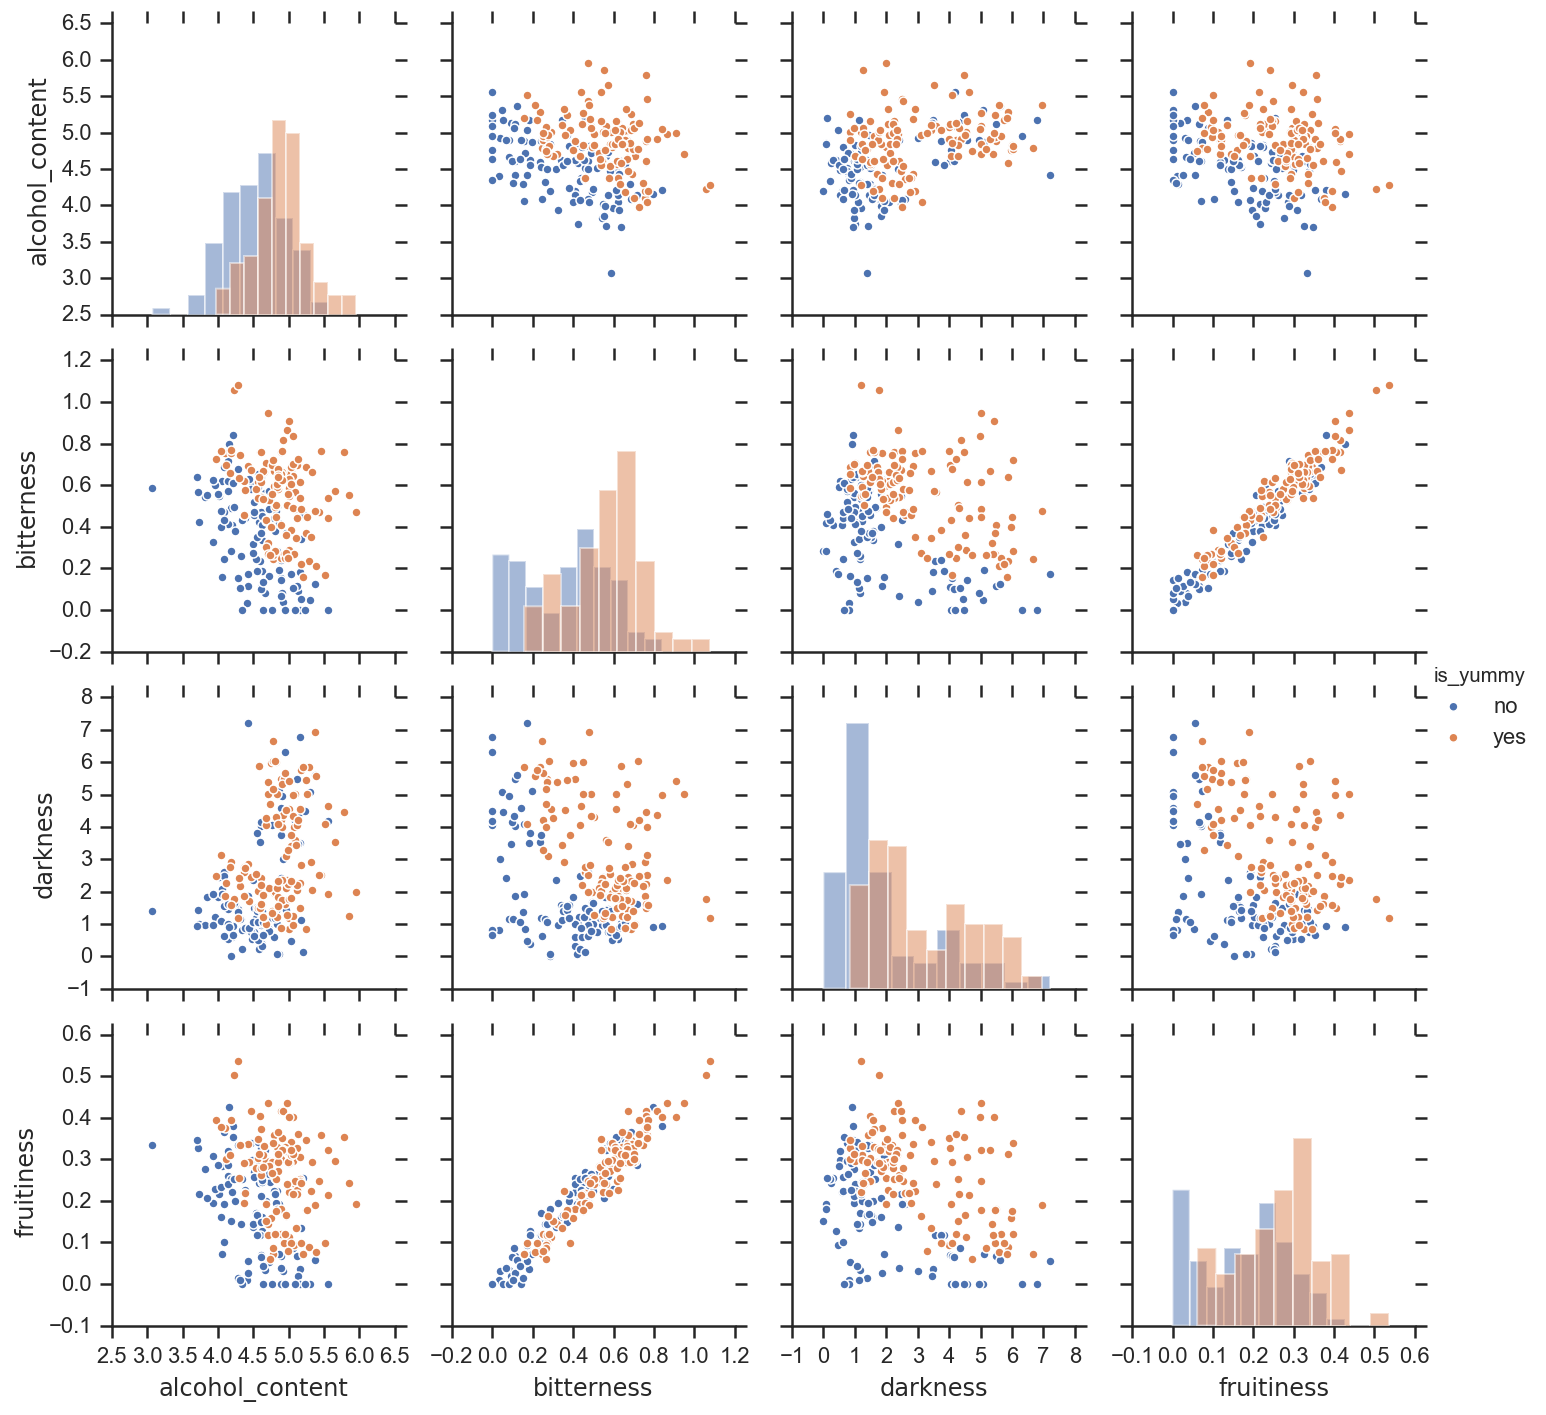

In [25]:
import seaborn as sns
sns.set(style="ticks")

for_plot = beer_data.copy()

def translate_label(value):
    # seaborn has issues if labes are numbers or strings which represent numbers,
    # for whatever reason "real" text labels work
    return "no" if value == 0 else "yes"

for_plot["is_yummy"] = for_plot["is_yummy"].apply(translate_label)

sns.pairplot(for_plot, hue="is_yummy", diag_kind="hist", diag_kws = dict(alpha=.5) );

What do we see?

- Points and colors don't look randomly distributed.
- We can see that some pairs like `darkness` vs `bitterness` seem to carry information which could support building a classifier.
- We also see that `bitterness` and `fruitiness` show correlation.
- We see slightly different distributions for features for each class.

Features which show no structure can also decrease performance of ML and often it makes sense to discard them.


### 3. Prepare data: split features and labels

In [26]:
# all columns up to the last one:
input_features = beer_data.iloc[:, :-1]

# only the last column:
labels = beer_data.iloc[:, -1]

print('# INPUT FEATURES')
print(input_features.head(5))
print('...')
print(input_features.shape)
print()
print('# LABELS')
print(labels.head(5))
print('...')
print(labels.shape)

# INPUT FEATURES
   alcohol_content  bitterness  darkness  fruitiness
0         3.739295    0.422503  0.989463    0.215791
1         4.207849    0.841668  0.928626    0.380420
2         4.709494    0.322037  5.374682    0.145231
3         4.684743    0.434315  4.072805    0.191321
4         4.148710    0.570586  1.461568    0.260218
...
(225, 4)

# LABELS
0    0
1    0
2    1
3    1
4    0
Name: is_yummy, dtype: int64
...
(225,)


### 4. Start machine learning using `scikit-learn`

Let's finally do some machine learning starting with the so called `LogisticRegression` classifier from `scikit-learn` package. The intention here is to experiment first. Details of this and further ML algorithms are not necessary at this point, but do not worry, they will come later during the course.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>LogisticRegression</code> is a classification method, even so the name contains "regression"-as the other group of unsupervised learning methods. In fact, in logistic regression method the (linear) regression is used internally and the result is then transformed (using logistic function) to probability of belonging to one of the two classes.
</div>

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>Built-in documentation</strong>

If you want to learn more about <code>LogisticRegression</code> you can use <code>help(LogisticRegression)</code> or <code>?LogisticRegression</code> to see the related documenation. The latter version works only in Jupyter Notebooks (or in IPython shell).
</div>

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all classifiers have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting classes from input features.</li>
</ul>
</div>

In [28]:
# Sanity check: can't predict if not fitted (trained)
classifier.predict(input_features)

NotFittedError: This LogisticRegression instance is not fitted yet

In [32]:
# Fit
classifier.fit(input_features, labels)

# Predict
predicted_labels = classifier.predict(input_features)
print(predicted_labels.shape)

(225,)


Here we've just re-classified our training data. Lets check our result with a few examples:

In [33]:
for i in range(5):
    print(labels[i], predicted_labels[i])

0 0
0 1
1 1
1 1
0 0


This looks suspicious !

Lets investigate this further:

In [34]:
print(len(labels), "examples")
print(sum(predicted_labels == labels), "labeled correctly")

225 examples
187 labeled correctly


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>predicted_labels == labels</code> evaluates to a vector of <code>True</code> or <code>False</code> Boolean values. When used as numbers, Python handles <code>True</code> as <code>1</code> and <code>False</code> as <code>0</code>. So, <code>sum(...)</code> simply counts the correctly predicted labels.
</div>


## What happened?

Why were not  all labels  predicted correctly?

Neither `Python` nor `scikit-learn` is broken. What we observed above is very typical for machine-learning applications.

Reasons could be:

- we have incomplete information: other features of beer which also contribute to the rating (like "maltiness") were not measured or can not be measured. 

- the used classifiers might have been not suitable for the given problem.

- noise in the data as incorrectly assigned labels also affect results.


**Finding sufficient features and clean data is crucial for the performance of ML algorithms!**


Another important requirement is to make sure that you have clean data: input-features might be corrupted by flawed entries, feeding such data into a ML algorithm will usually lead to reduced performance.

# Exercise section 1

### 1. Compare with alternative machine learning method from `scikit-learn`

Now, using previously loaded and prepared beer data, train a different `scikit-learn` classifier - the so called **Support Vector Classifier** `SVC`, and evaluate its "re-classification" performance again.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>SVC</code>  belongs to a class of algorithms named "Support Vector Machines" (SVMs). Again, it will be discussed in more detail in the following scripts.
</div>

In [35]:
from sklearn.svm import SVC
classifier = SVC()
# ...

In [36]:
classifier = SVC()
classifier.fit(input_features, labels)

predicted_labels = classifier.predict(input_features)

assert(predicted_labels.shape == labels.shape)
print(len(labels), "examples")
print(sum(predicted_labels == labels), "labeled correctly")

225 examples
205 labeled correctly


Better?

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
Better re-classification in our example does not indicate here that <code>SVC</code> is better than <code>LogisticRegression</code> in all cases. The performance of a classifier strongly depends on the data set.
</div>




### 2. Experiment with hyperparameters of ML methods

Both `LogisticRegression` and `SVC` classifiers have a hyperparameter `C` which allows to enforce a "simplification" (often called **regularization**) of the resulting model. Test the beers data "re-classification" with different values of this parameter.

In [37]:
# Recall: ?LogisticRegression
# ...
?LogisticRegression

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<strong>Classifiers have hyper-parameters</strong>
    
All classifiers have hyper-parameters, e.g. the `C` we have seen before. It is an incident that both, `LogisticRegression` and `SVC`, have parameter named `C`. Beyond that some classifiers have more than one parameter, e.g. `SVC` also has a parameter `gamma`. But more about these details later.
    
</div>

# Exercise section 2 (optional)

Load and inspect the cannonical Fisher's "Iris" data set, which is included in `scikit-learn`: see [docs for `sklearn.datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). What's conceptually diffferent?

Inspect the data using scatter plots.

Apply `LogisticRegression` or `SVC` classifiers. Is it easier or more difficult than classification of the beers data?



In [38]:
from sklearn.datasets import load_iris

data = load_iris()

# labels as text
print(data.target_names) 

# (rows, columns) of the feature matrix:
print(data.data.shape)


['setosa' 'versicolor' 'virginica']
(150, 4)


In [39]:
# transform the scikit-learn data structure into a data frame:
df = pd.DataFrame(data.data, columns=data.feature_names)

# add new column
df["class"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
